### Assessing a diabetes prediction classifier

In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into X_train, X_test, y_train, and y_test. In addition, a KNeighborsClassifier() has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

In [8]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
import pandas as pd

knn = KNeighborsClassifier(n_neighbors=6)

diabetes_df = pd.read_csv('..\\datasets\\diabetes_clean.csv', delimiter=',')
print(diabetes_df.head())
diabetes_df.describe()

X = diabetes_df.drop("diabetes", axis=1).values 
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
[[81 18]
 [24 31]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



In [ ]:
Reminders 

* Confusion_matrix  :               
                             Predicted Class
                            |   Positive    |   Negative    |
Actual       | Positive     |    TP         |    FN         |
Class        | Negative     |    FP         |    TN         |

* Precision = TP / ( TP + FP )

* Recall    = TP / ( TP + FN ) => Sensitivity

* F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

* The support column indicates the number of occurrences of each class in the actual dataset. 
  It represents the true number of instances belonging to each class
  In the above case : 99+55 is the total instances of y_test (wich itself is 20% of y)

### Building a logistic regression model

In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. 
The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

In [17]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression 

# Instantiate the model
logreg = LogisticRegression(max_iter=7600, solver='lbfgs')

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[:10])

# predict_proba gives real probabilities, use by predict() function to label/tag/classfy each instance
# So predict_proba is more interesting to checkout how confidant can we classify a person as having a diabt or not !
    p > 0.5 => 1
    p < 0.5 => 0
# We can't tell for the ones near 0.5 probability
y_pred = logreg.predict(X_test)
print(y_pred[:10])

[0.27586651 0.18846513 0.11448857 0.16353448 0.47142166 0.44173324
 0.01546317 0.66081045 0.54148507 0.77722877]
[0 0 0 0 0 0 0 1 1 1]


### The ROC curve

If we vary the default 0.5 threshold, we would get diffrent (FP, TP) pair, and thus from p=0 to p=1 we got different (FP, TP) points on the graph, and that is the ROC CURVE for this LR model.
Another model would give another plot/graph, and the begiier the AreaUnderThe Curve (AUC) is, the better
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

[       inf 0.97115949 0.96814389 0.95628172 0.90262235 0.89731597
 0.80093909 0.77808944 0.77783536 0.77722877 0.73274825 0.72426699
 0.68333878 0.67526798 0.66093631 0.66081045 0.65558105 0.64970391
 0.63932143 0.61652142 0.60589648 0.58357691 0.55043872 0.53949599
 0.53416087 0.50299746 0.50246091 0.42037938 0.4201743  0.40866689
 0.38101333 0.33910885 0.32715677 0.30299677 0.30270644 0.25740101
 0.24070454 0.22535465 0.22518856 0.20834778 0.20490153 0.16353448
 0.14043983 0.12823725 0.12699015 0.11448857 0.11429326 0.04152566
 0.04050788 0.00417561]


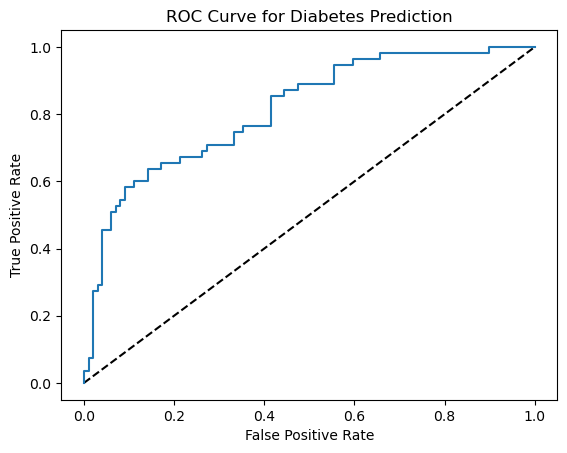

In [22]:
# Import roc_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
print(thresholds)
plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

### ROC AUC

In [18]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8128558310376492
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### Hyperparameter tuning with GridSearchCV

Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

In [20]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso = Lasso()
kf = KFold(n_splits=6, shuffle=True, random_state=5)
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.05264105263157895}
Tuned lasso score: 0.24423604495663032


### Hyperparameter tuning with RandomizedSearchCV

As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space.
In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options

In [24]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}


# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.18375510204081633, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 1.0}
Tuned Logistic Regression Best Accuracy Score: 0.7557268862237452


C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
42 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packa